In [ ]:
# DAY 4

In [ ]:
#  Split the dataset into train and test sets - 80% training and 20% testing
# Train a Logistic Regression model
# Make predictions on the test set
# Evaluate the accuracy of your model
#  Display a confusion matrix
# Train a Decision Tree Classifier

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [28]:
df= pd.read_csv('./iris/iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [29]:
x=df.drop("Species",axis=1)
y=df['Species']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scal=scaler.fit_transform(x_train)
x_test_scal=scaler.transform(x_test)

In [31]:
model=LogisticRegression(max_iter=1000)
model.fit(x_scal,y_train)


LogisticRegression(max_iter=1000)

In [32]:
y_pred=model.predict(x_test_scal)

ACCuracy of the model: 1.0


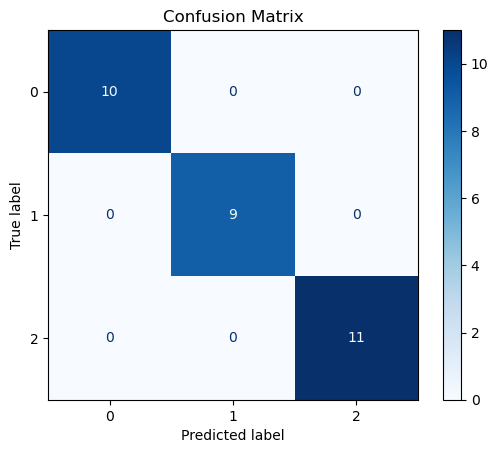

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

acc=accuracy_score(y_test,y_pred)
print("ACCuracy of the model:",acc)
cof_mat=confusion_matrix(y_test,y_pred)
matt=ConfusionMatrixDisplay(confusion_matrix=cof_mat)
matt.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()




In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# DAY 5

In [ ]:
# Normalize the numerical features
# Save the cleaned dataset to a new CSV file
# Write a function to predict species from input values
# Create a simple bar chart of species count
# Export your trained model using joblib or pickle

In [35]:
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
# print(df.head())

In [36]:
from sklearn.preprocessing import MinMaxScaler

feat=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
scal=MinMaxScaler()
norm=scal.fit_transform(df[feat])

In [37]:
df.to_csv("clean_iris.csv", index=False)
print("Data saved as clean_iris.csv")


Data saved as clean_iris.csv


In [ ]:
def predict_species(SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm, model):
    input_dat = [[0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]]
    prediction = model.predict(input_dat)
    return prediction[0]

sp=float(input("Enter Sepal Length :"))
sw=float(input("Enter Sepal Width :"))
pl=float(input("Enter Petal Length :"))
pw=float(input("Enter Petal Width :"))
print("Prediction is:")
print(predict_species(sp,sw,pl,pw,model))
# 0.5, 0.5, 0.2, 0.1
# 4.7           3.2            1.3           0.2  

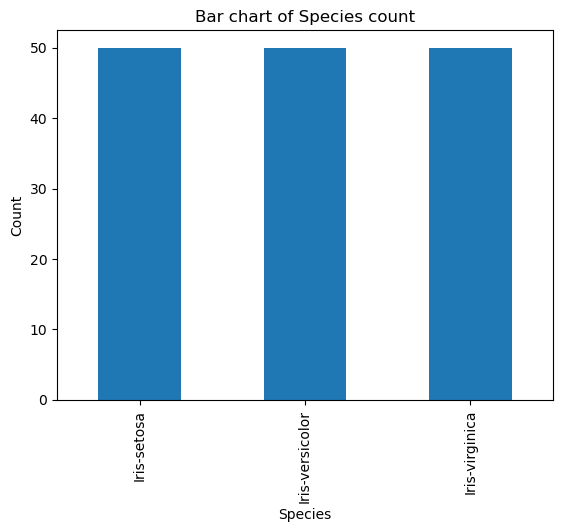

In [40]:
import matplotlib.pyplot as plt

df['Species'].value_counts().plot(kind='bar')
plt.title('Bar chart of Species count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


In [44]:
import joblib
joblib.dump(model,'iris_mod.joblib')
print("Exported the model using Joblib")

Exported the model using Joblib
